In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [12]:
random.seed(42)
arms = 20
iterations = 10000
epsilon =[0,0.01,0.1]
mu = [random.normalvariate(0,1) for i in range(arms)]
optim_arm = np.argmax(mu)
alpha = 0.1

##Epsilon Greedy

In [13]:
rewards_greedy = [[],[],[]]
for n,e in enumerate(epsilon) :
  s = 0
  Q = np.zeros(arms)
  count = np.ones(arms)
  optim_count_greedy = [[],[],[]]
  for i in range(1,iterations):
    if random.random() <= e:
      A = random.randint(0,arms-1)
    else:
      A = np.argmax(Q)
    r = random.normalvariate(mu[A],1)
    s+=r
    rewards_greedy[n].append(s/i)
    count[A]+=1
    if(A == optim_arm):
      optim_count_greedy[n].append(count[A]/i)
    Q[A] = Q[A]+(1/count[A])*(r-Q[A])

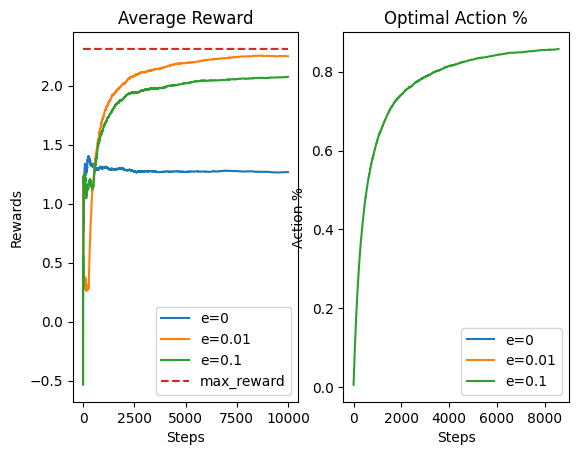

In [14]:
plt.subplot(1,2,1)
plt.plot(rewards_greedy[0])
plt.plot(rewards_greedy[1])
plt.plot(rewards_greedy[2])
plt.plot(np.ones(iterations)*(np.max(mu)),'--')
plt.legend(['e=0','e=0.01','e=0.1','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(optim_count_greedy[0])
plt.plot(optim_count_greedy[1])
plt.plot(optim_count_greedy[2])
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend(['e=0','e=0.01','e=0.1'])
plt.show()

##Optimistic Intial Value

In [15]:
rewards_optim = [[],[],[]]
for n,e in enumerate(epsilon) :
  s = 0
  Q = np.ones(arms)*4
  count = np.ones(arms)
  optim_count_optim = [[],[],[]]
  for i in range(1,iterations):
    if random.random() <= e:
      A = random.randint(0,arms-1)
    else:
      A = np.argmax(Q)
    r = random.normalvariate(mu[A],1)
    s+=r
    rewards_optim[n].append(s/i)
    count[A]+=1
    if(A == optim_arm):
      optim_count_optim[n].append(count[A]/i)
    Q[A] = Q[A]+(1/count[A])*(r-Q[A])

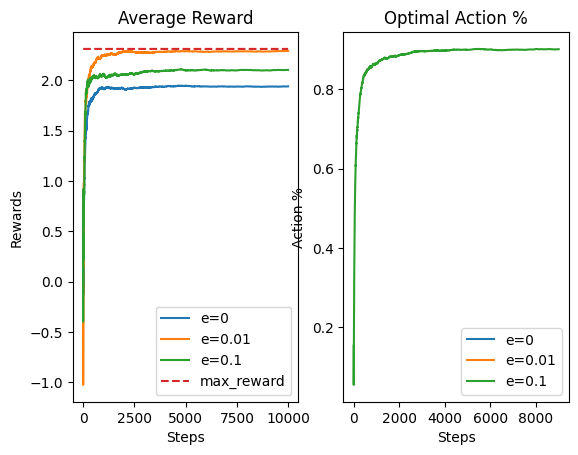

In [16]:
plt.subplot(1,2,1)
plt.plot(rewards_optim[0])
plt.plot(rewards_optim[1])
plt.plot(rewards_optim[2])
plt.plot(np.ones(iterations)*(np.max(mu)),'--')
plt.legend(['e=0','e=0.01','e=0.1','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(optim_count_optim[0])
plt.plot(optim_count_optim[1])
plt.plot(optim_count_optim[2])
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend(['e=0','e=0.01','e=0.1'])
plt.show()

##UCB Algorithm

In [17]:
rewards_ucb = [[],[],[]]
for n,e in enumerate(epsilon) :
  s = 0
  Q = np.zeros(arms)
  count = np.ones(arms)
  optim_count_ucb = [[],[],[]]
  for i in range(1,iterations):
    Q_ucb = [x+ 2*(np.sqrt(np.log(i)/count[n])) for n,x in enumerate(Q)]
    A = np.argmax(Q_ucb)
    r = random.normalvariate(mu[A],1)
    s+=r
    rewards_ucb[n].append(s/i)
    count[A]+=1
    if(A == optim_arm):
      optim_count_ucb[n].append(count[A]/i)
    Q[A] = Q[A]+(1/count[A])*(r-Q[A])

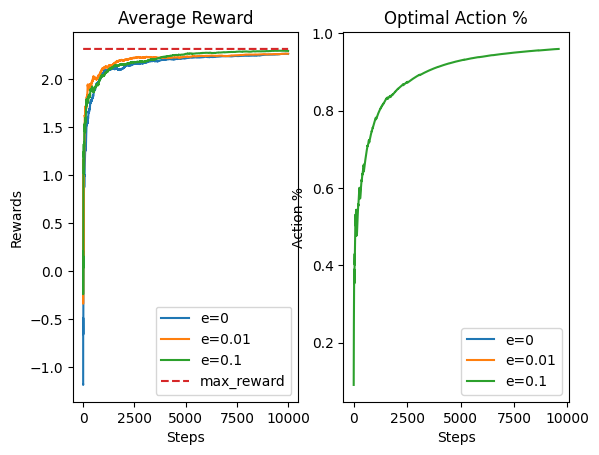

In [18]:
plt.subplot(1,2,1)
plt.plot(rewards_ucb[0])
plt.plot(rewards_ucb[1])
plt.plot(rewards_ucb[2])
plt.plot(np.ones(iterations)*(np.max(mu)),'--')
plt.legend(['e=0','e=0.01','e=0.1','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(optim_count_ucb[0])
plt.plot(optim_count_ucb[1])
plt.plot(optim_count_ucb[2])
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend(['e=0','e=0.01','e=0.1'])
plt.show()

##Gradient Bandit Algorithm

In [19]:
rewards_grad = []
s = 0
H = np.zeros(arms)
count = np.ones(arms)
optim_count_grad = []
for i in range(1,iterations):
  policy = np.exp(H)/np.sum(np.exp(H))
  A = np.random.choice(arms,p=policy)
  r = random.normalvariate(mu[A],1)
  s+=r
  rewards_grad.append(s/i)
  count[A]+=1
  if(A == optim_arm):
    optim_count_grad.append(count[A]/i)
  for a in range(len(H)):
    if(a==A):
      H[a] = H[a]+alpha*(r-rewards_grad[i-1])*(1-policy[a])
    else:
      H[a] = H[a]-alpha*(r-rewards_grad[i-1])*(policy[a])
  # print(H,policy,A)

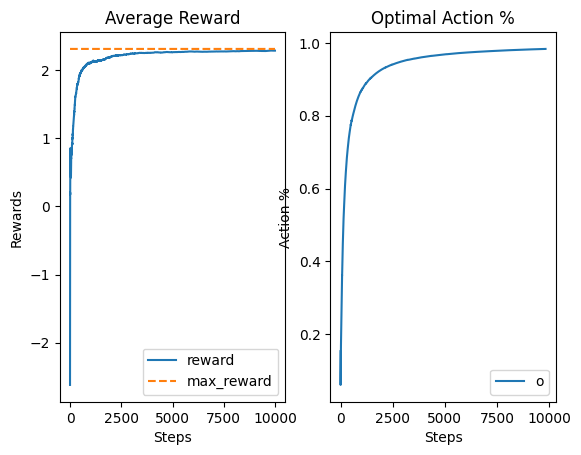

In [20]:
plt.subplot(1,2,1)
plt.plot(rewards_grad)
plt.plot(np.ones(iterations)*(np.max(mu)),'--')
plt.legend(['reward','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(optim_count_grad)
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend('optimal Action%')
plt.show()

##Comparision

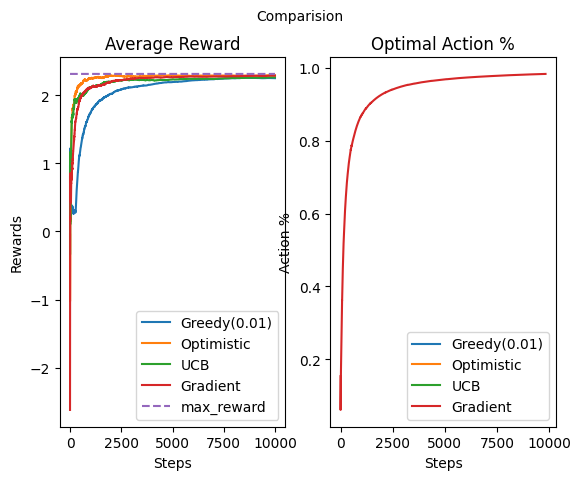

In [21]:
plt.subplot(1,2,1)
plt.plot(rewards_greedy[1])
plt.plot(rewards_optim[1])
plt.plot(rewards_ucb[1])
plt.plot(rewards_grad)
plt.plot(np.ones(iterations)*(max(mu)),'--')
plt.legend(['Greedy(0.01)','Optimistic','UCB','Gradient','max_reward'])
plt.xlabel('Steps')
plt.ylabel('Rewards')
plt.title('Average Reward')
plt.subplot(1,2,2)
plt.plot(optim_count_greedy[1])
plt.plot(optim_count_optim[1])
plt.plot(optim_count_ucb[1])
plt.plot(optim_count_grad)
plt.title('Optimal Action %')
plt.xlabel('Steps')
plt.ylabel('Action %')
plt.legend(['Greedy(0.01)','Optimistic','UCB','Gradient'])
plt.suptitle('Comparision',fontsize=10)
plt.show()
